In [ ]:
from google.colab import drive
drive.mount('/content/drive')
path='/content/drive/MyDrive/Bank_Personal_Loan_Modelling.csv'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Using Logistic Regression,I created a model to predict with 96%
accuracy whether a customer will apply for a personal loan from
a bank:Implemented via Statsmodels and Scikit-Learn

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import regex as re
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import statsmodels.api as sm
from sklearn.metrics import accuracy_score,roc_auc_score,precision_score,recall_score

In [ ]:
df=pd.read_csv(path)
print(df.head())

   ID  Age  Experience  Income  ZIP Code  Family  CCAvg  Education  Mortgage  \
0   1   25           1      49     91107       4    1.6          1         0   
1   2   45          19      34     90089       3    1.5          1         0   
2   3   39          15      11     94720       1    1.0          1         0   
3   4   35           9     100     94112       1    2.7          2         0   
4   5   35           8      45     91330       4    1.0          2         0   

   Personal Loan  Securities Account  CD Account  Online  CreditCard  
0              0                   1           0       0           0  
1              0                   1           0       0           0  
2              0                   0           0       0           0  
3              0                   0           0       0           0  
4              0                   0           0       0           1  


In [ ]:
df=df.drop(['ID'],axis=1)

In [ ]:
print(df['ZIP Code'].value_counts())

94720    169
94305    127
95616    116
90095     71
93106     57
        ... 
96145      1
94087      1
91024      1
9307       1
94598      1
Name: ZIP Code, Length: 467, dtype: int64


In [ ]:
print(df['Education'].value_counts())

1    2096
3    1501
2    1403
Name: Education, dtype: int64


In [ ]:
df=df.rename(columns={'ZIP Code':'ZIPCode'})
df.ZIPCode=df.ZIPCode.astype('object')
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Age                 5000 non-null   int64  
 1   Experience          5000 non-null   int64  
 2   Income              5000 non-null   int64  
 3   ZIPCode             5000 non-null   object 
 4   Family              5000 non-null   int64  
 5   CCAvg               5000 non-null   float64
 6   Education           5000 non-null   int64  
 7   Mortgage            5000 non-null   int64  
 8   Personal Loan       5000 non-null   int64  
 9   Securities Account  5000 non-null   int64  
 10  CD Account          5000 non-null   int64  
 11  Online              5000 non-null   int64  
 12  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(11), object(1)
memory usage: 507.9+ KB
None


In [ ]:
df_numeric=df.select_dtypes(include='number')
df_numeric=df_numeric.drop(['Personal Loan'],axis=1)
print(df_numeric.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Age                 5000 non-null   int64  
 1   Experience          5000 non-null   int64  
 2   Income              5000 non-null   int64  
 3   Family              5000 non-null   int64  
 4   CCAvg               5000 non-null   float64
 5   Education           5000 non-null   int64  
 6   Mortgage            5000 non-null   int64  
 7   Securities Account  5000 non-null   int64  
 8   CD Account          5000 non-null   int64  
 9   Online              5000 non-null   int64  
 10  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(10)
memory usage: 429.8 KB
None


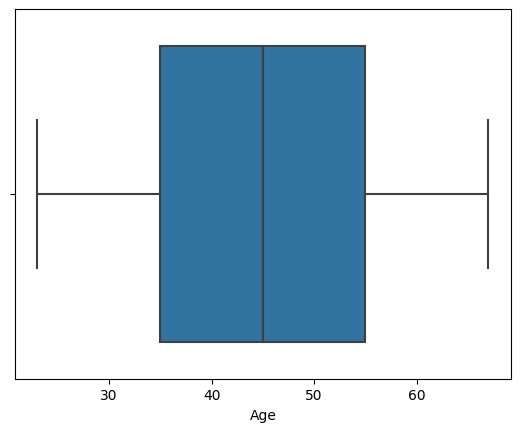

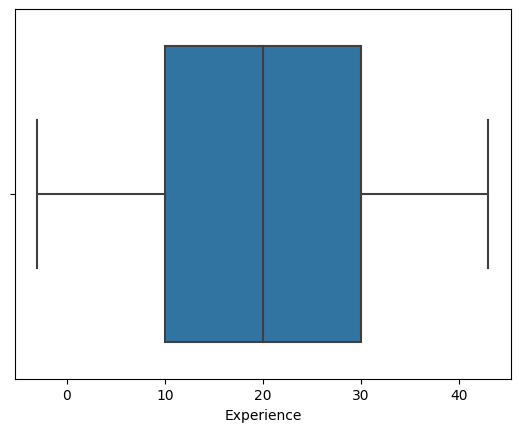

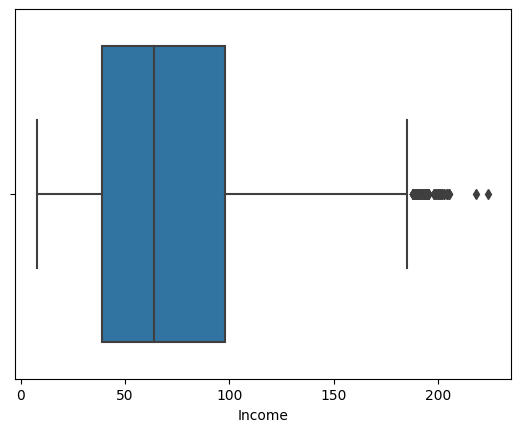

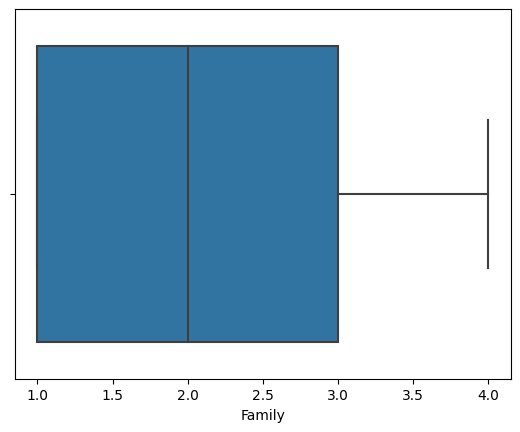

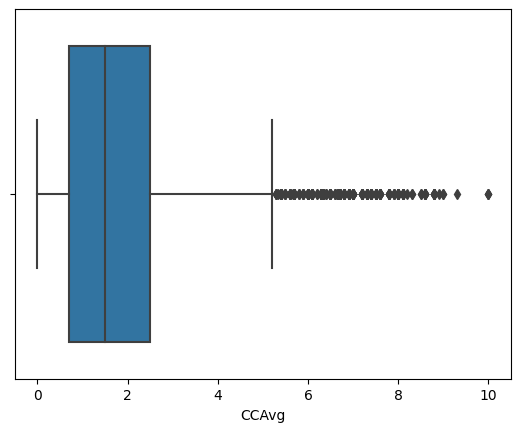

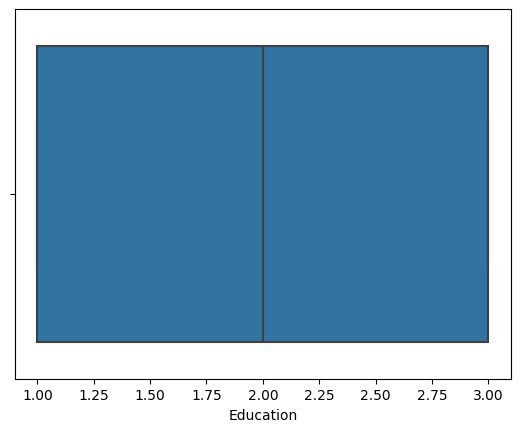

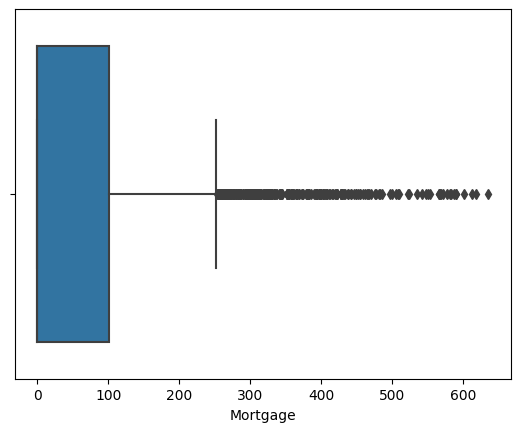

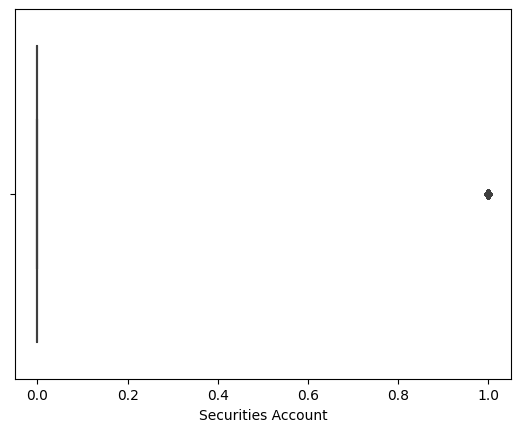

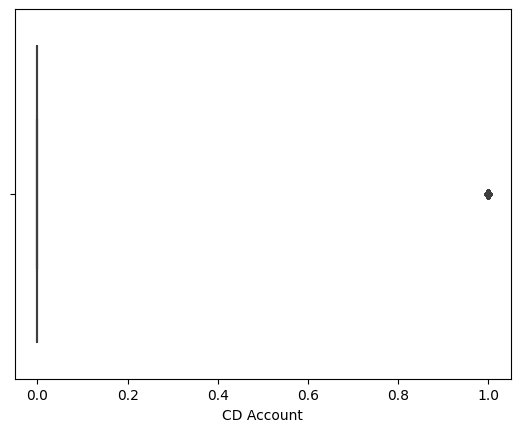

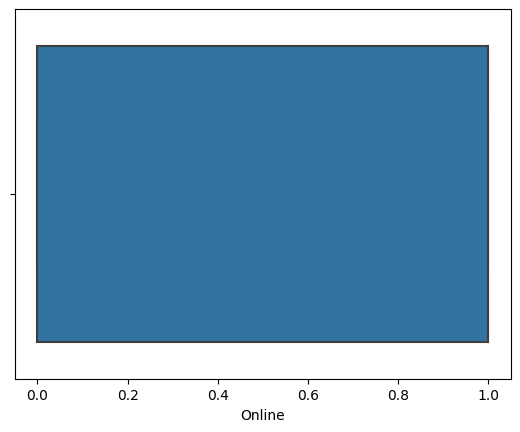

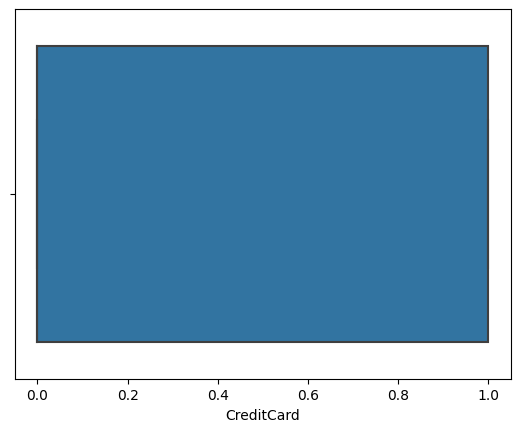

In [ ]:
def visualize_box_plot(column_name):
  sns.boxplot(data=df_numeric,x=df_numeric[column_name]);
  plt.show()
for i in df_numeric.columns:
  visualize_box_plot(i)

In [ ]:
print(df['CreditCard'].value_counts())

0    3530
1    1470
Name: CreditCard, dtype: int64


In [ ]:
print(df['Online'].value_counts())

1    2984
0    2016
Name: Online, dtype: int64


In [ ]:
print(df['Securities Account'].value_counts())

0    4478
1     522
Name: Securities Account, dtype: int64


In [ ]:
print(df['CD Account'].value_counts())

0    4698
1     302
Name: CD Account, dtype: int64


In [ ]:
df_numeric=df_numeric.drop(['CreditCard','Online','Securities Account','CD Account'],axis=1)
print(df_numeric.head())

   Age  Experience  Income  Family  CCAvg  Education  Mortgage
0   25           1      49       4    1.6          1         0
1   45          19      34       3    1.5          1         0
2   39          15      11       1    1.0          1         0
3   35           9     100       1    2.7          2         0
4   35           8      45       4    1.0          2         0


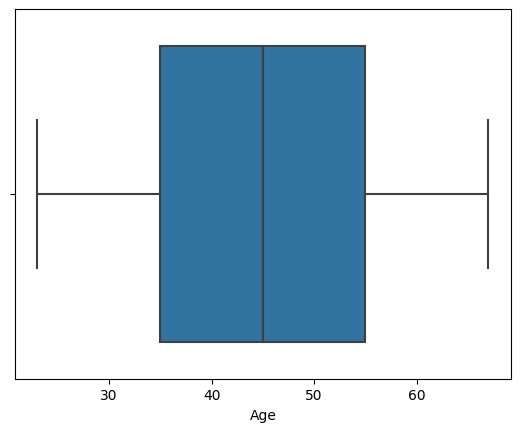

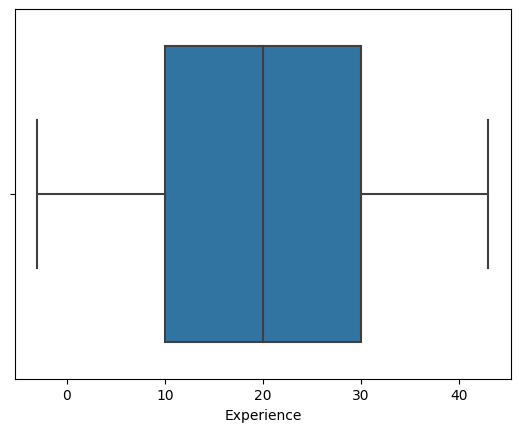

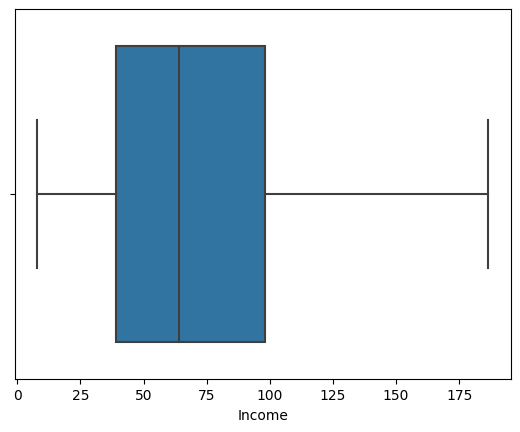

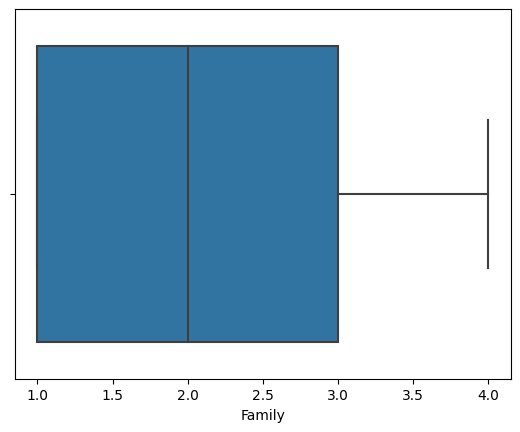

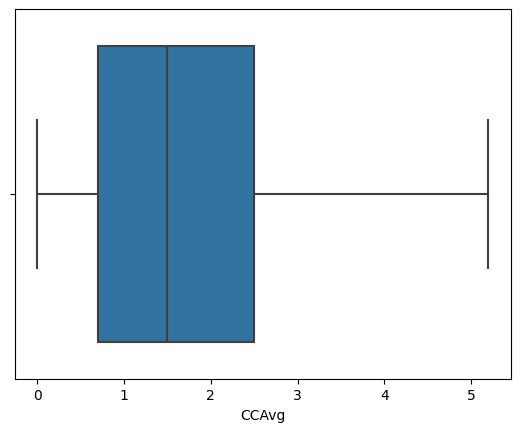

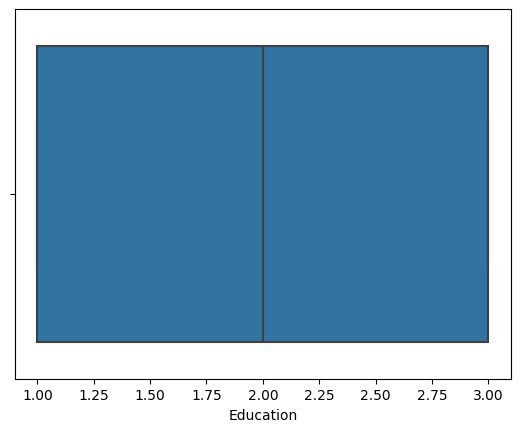

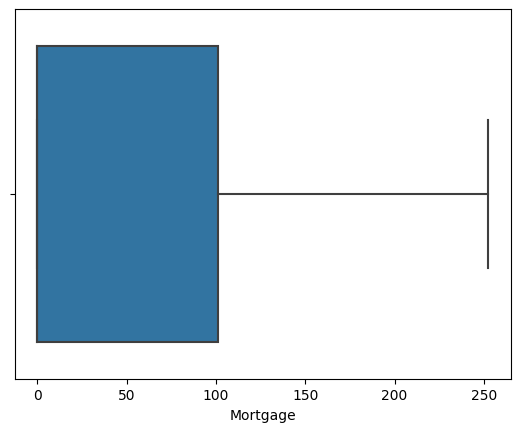

In [ ]:
def treat_outliers(column_name):
  q1=df_numeric[column_name].quantile(0.25)
  q3=df_numeric[column_name].quantile(0.75)
  iqr=q3-q1
  lower_lim=q1-(1.5*iqr)
  upper_lim=q3+(1.5*iqr)
  for i in df_numeric[column_name]:
    if i>upper_lim:
      df_numeric[column_name]=df_numeric[column_name].replace([i],upper_lim)
    if i<lower_lim:
      df_numeric[column_name]=df_numeric[column_name].replace([i],lower_lim)
for i in df_numeric.columns:
  treat_outliers(i)
  visualize_box_plot(i)

In [ ]:
for i in df_numeric.columns:
  df=df.drop(i,axis=1)
df=pd.concat([df,df_numeric],axis=1)
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ZIPCode             5000 non-null   object 
 1   Personal Loan       5000 non-null   int64  
 2   Securities Account  5000 non-null   int64  
 3   CD Account          5000 non-null   int64  
 4   Online              5000 non-null   int64  
 5   CreditCard          5000 non-null   int64  
 6   Age                 5000 non-null   int64  
 7   Experience          5000 non-null   int64  
 8   Income              5000 non-null   float64
 9   Family              5000 non-null   int64  
 10  CCAvg               5000 non-null   float64
 11  Education           5000 non-null   int64  
 12  Mortgage            5000 non-null   float64
dtypes: float64(3), int64(9), object(1)
memory usage: 507.9+ KB
None


In [ ]:
y=df['Personal Loan']
print(y)
df_new=df.drop('Personal Loan',axis=1)

0       0
1       0
2       0
3       0
4       0
       ..
4995    0
4996    0
4997    0
4998    0
4999    0
Name: Personal Loan, Length: 5000, dtype: int64


In [ ]:
iv_threshold=0.02
for i in df_new.columns:
  sum_iv=0
  if df_new[i].dtype=='object':
    temp_df=pd.crosstab(df_new[i],df['Personal Loan'],normalize='columns').assign(iv=lambda dfx:(dfx[1]-dfx[0])*np.log(dfx[1]/dfx[0]))
    sum_iv=temp_df['iv'].sum()
    if sum_iv<iv_threshold:
      df_new=df_new.drop(i,axis=1)
  else:
    s=pd.qcut(df_new[i],[0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1],duplicates='drop',retbins=True)
    for j in s[1]:
      xy=df_new.loc[df_new[i]<=j]
      try:
        temp_df=pd.crosstab(xy[i],df['Personal Loan'],normalize='columns').assign(iv=lambda dfx:(dfx[1]-dfx[0])*np.log(dfx[1]/dfx[0]))
      except Exception:
        temp_df=pd.crosstab(xy[i],df['Personal Loan'],normalize='columns').assign(iv=lambda dfx:10)
    for z in temp_df['iv']:
      sum_iv+=z
    if sum_iv<iv_threshold:
      df_new=df_new.drop(i,axis=1)
      sum_iv=0
      temp_df=None


print(df_new.columns)

/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = geta

Index(['ZIPCode', 'CD Account', 'Age', 'Experience', 'Income', 'Family',
       'CCAvg', 'Education', 'Mortgage'],
      dtype='object')


/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = geta

In [ ]:
df=df.select_dtypes(exclude='number')

In [ ]:
df_new=df_new.drop('ZIPCode',axis=1)
df=pd.concat([df,df_new],axis=1)
print(df.head())

  ZIPCode  CD Account  Age  Experience  Income  Family  CCAvg  Education  \
0   91107           0   25           1    49.0       4    1.6          1   
1   90089           0   45          19    34.0       3    1.5          1   
2   94720           0   39          15    11.0       1    1.0          1   
3   94112           0   35           9   100.0       1    2.7          2   
4   91330           0   35           8    45.0       4    1.0          2   

   Mortgage  
0       0.0  
1       0.0  
2       0.0  
3       0.0  
4       0.0  


In [ ]:
df=pd.get_dummies(df)
print(len(df.columns))

475


<ipython-input-127-97d78747c93a>:1: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  df=pd.get_dummies(df)


In [ ]:
for i in df.columns:
  if i.startswith('ZIPCode'):
    if i=='ZIPCode_94720' or i=='ZIPCode_94305' or i=='ZIPCode_95616' or i=='ZIPCode_90095' or i=='ZIPCode_93106':
      pass
    else:
      df=df.drop(i,axis=1)
print(df.columns)

Index(['CD Account', 'Age', 'Experience', 'Income', 'Family', 'CCAvg',
       'Education', 'Mortgage', 'ZIPCode_90095', 'ZIPCode_93106',
       'ZIPCode_94305', 'ZIPCode_94720', 'ZIPCode_95616'],
      dtype='object')


In [ ]:
for i in df.columns:
  print(df[i].isnull().sum())

0
0
0
0
0
0
0
0
0
0
0
0
0


In [ ]:
X=df
print(X.head())

   CD Account  Age  Experience  Income  Family  CCAvg  Education  Mortgage  \
0           0   25           1    49.0       4    1.6          1       0.0   
1           0   45          19    34.0       3    1.5          1       0.0   
2           0   39          15    11.0       1    1.0          1       0.0   
3           0   35           9   100.0       1    2.7          2       0.0   
4           0   35           8    45.0       4    1.0          2       0.0   

   ZIPCode_90095  ZIPCode_93106  ZIPCode_94305  ZIPCode_94720  ZIPCode_95616  
0              0              0              0              0              0  
1              0              0              0              0              0  
2              0              0              0              1              0  
3              0              0              0              0              0  
4              0              0              0              0              0  


In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3)

In [ ]:
model=LogisticRegression().fit(X_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
y_pred_test=model.predict(X_test)

In [ ]:
print('Accuracy : ',accuracy_score(y_test,y_pred_test))
print('Precision: ',precision_score(y_test,y_pred_test))
print('Recall: ',recall_score(y_test,y_pred_test))
print('ROC-AUC Score: ',roc_auc_score(y_test,y_pred_test))

Accuracy :  0.966
Precision:  0.8613861386138614
Recall:  0.7016129032258065
ROC-AUC Score:  0.8457192423105777


In [ ]:
def training_OLS(X_train_local):
    logit_model=sm.Logit(y_train,X_train_local).fit()
    return logit_model.pvalues

In [ ]:
p_values=training_OLS(X_train)
count=0
alpha=0.05
drop_columns=[]
while len(X_train.columns)>0:
  for i in range(0,len(p_values)):
    if p_values[i]>alpha:
      drop_columns.append(X_train.columns[i])
      count+=1
  if count==0:
    break
  else:
    X_train=X_train.drop(drop_columns,axis=1)
    drop_columns=[]
    count=0
    p_values=training_OLS(X_train)

Optimization terminated successfully.
         Current function value: 0.147334
         Iterations 9
                           Logit Regression Results                           
Dep. Variable:          Personal Loan   No. Observations:                 3500
Model:                          Logit   Df Residuals:                     3487
Method:                           MLE   Df Model:                           12
Date:                Tue, 08 Aug 2023   Pseudo R-squ.:                  0.5519
Time:                        06:26:52   Log-Likelihood:                -515.67
converged:                       True   LL-Null:                       -1150.9
Covariance Type:            nonrobust   LLR p-value:                1.134e-264
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
CD Account        2.0107      0.253      7.956      0.000       1.515       2.506
Age              -0.

In [ ]:
model=LogisticRegression().fit(X_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
X_test=X_test[X_train.columns]
y_pred_test=model.predict(X_test)

In [ ]:
print('Accuracy : ',accuracy_score(y_test,y_pred_test))
print('Precision: ',precision_score(y_test,y_pred_test))
print('Recall: ',recall_score(y_test,y_pred_test))
print('ROC-AUC Score: ',roc_auc_score(y_test,y_pred_test))

Accuracy :  0.9646666666666667
Precision:  0.8514851485148515
Recall:  0.6935483870967742
ROC-AUC Score:  0.8413236121530383
